# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Загрузка данных

In [3]:
data = pd.read_csv('data/titanic_train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


# Визуальный анализ данных

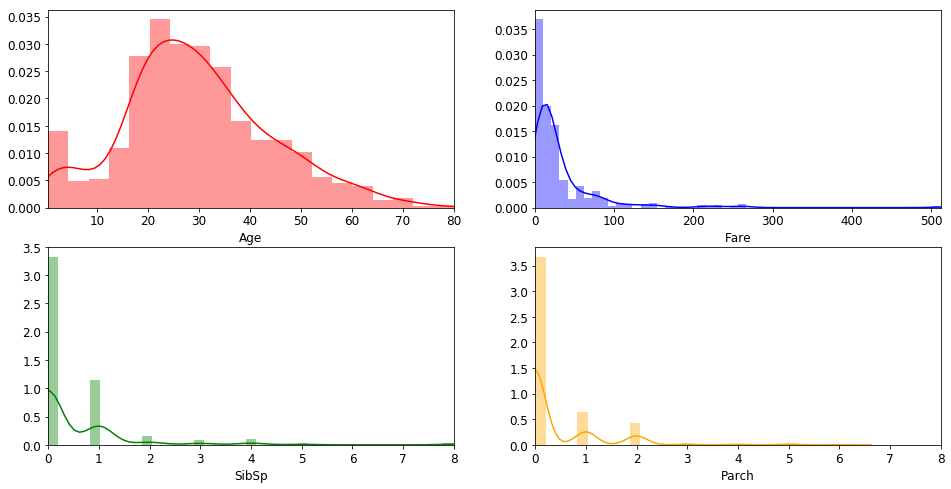

In [5]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(16, 8))

plt.subplot(2,2,1)
plt.xlim(data.Age.min(), data.Age.max())
sns.distplot(data.Age, label='Age', color='red')

plt.subplot(2,2,2)
plt.xlim(data.Fare.min(), data.Fare.max())
sns.distplot(data.Fare, label='Fare', color='blue')

plt.subplot(2,2,3)
plt.xlim(data.SibSp.min(), data.SibSp.max())
sns.distplot(data.SibSp, label='Number of siblings', color='green')

plt.subplot(2,2,4)
plt.xlim(data.SibSp.min(), data.SibSp.max())
sns.distplot(data.Parch, label='Number of children/parents', color='orange')

In [6]:
data.Survived.value_counts() #число выживших/погибших

0    549
1    342
Name: Survived, dtype: int64

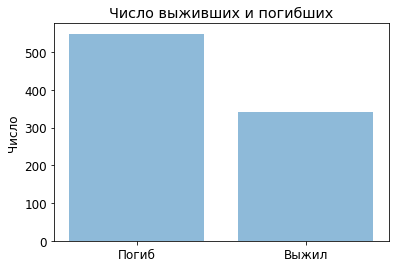

In [7]:
values = ['Погиб', 'Выжил']
y_pos = np.arange(len(values))
performance = [data.Survived.value_counts()[0], data.Survived.value_counts()[1]]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, values)
plt.ylabel('Число')
plt.title('Число выживших и погибших')
plt.show()

# Подготовка данных
###### Наиболее важными процедурами в очистке данных являются заполнение пустот и кодирование категориальных признаков, т.к. большинство алгоритмов машинного обученияумеют работать только с данными типа float и не умеют обрабатывать пустые значения

In [8]:
data.count() # команда выводит количество не пустых полей для каждого признака в наборе данных

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [9]:
data.Age = data.Age.fillna(data.Age.mean()) # заменяем пустые значения на среднее значение по признаку
data.Ticket = data.Ticket.fillna("_MISSING_") # код билета, заменяем пустые значения на _MISSING_ 
data.Fare = data.Fare.fillna(-999) #цена за билет
data.Embarked = data.Embarked.fillna("_MISSING_") #код порта посадки пассажиров
data.Cabin = data.Cabin.fillna("_MISSING_") #код каюты пассажира

In [10]:
for column in ["Name", "Sex", "Ticket", "Embarked", "Cabin"]:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column]) # производим кодирование категориальных признаков

# Разбиение датасета на входные данные и целевой признак
###### Признаки в датасете необходимо разбить на X и Y, где X - данные по которым будет предсказываться целевой признак Y

In [11]:
X = data.drop(["Survived"], axis=1)
y = data.Survived

In [12]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,108,1,22.00,1,0,523,7.25,147,2
1,2,1,190,0,38.00,1,0,596,71.28,81,0
2,3,3,353,0,26.00,0,0,669,7.92,147,2
3,4,1,272,0,35.00,1,0,49,53.10,55,2
4,5,3,15,1,35.00,0,0,472,8.05,147,2


In [13]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Разбиение выборки на тренировочную и валидационную
###### Для оценки адекватности обученных моделей дата-аналитики оценивают свою работу на валидационном наборе данных, где валидационный набор данных - часть тренировочного датасета.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

# Обучение моделей

In [15]:
log_reg = LogisticRegression() # инициализируем модели
naive_bayes = GaussianNB()
knn = KNeighborsClassifier()
svm = LinearSVC()
decision_tree = DecisionTreeClassifier()

In [16]:
for model in [log_reg, naive_bayes, knn, svm, decision_tree]:
    model.fit(X_train, y_train) # обучаем каждую модель из списка на тренировочном наборе данных

# Классификация с помощью обученных моделей и оценка результата

In [17]:
for model, model_name in [(log_reg, "logistic_regression"), (naive_bayes, "naive_bayes"),
                          (knn, "k_nearest_neighbors"), (svm, "svm"), (decision_tree, "decision_tree")]:
    
    prediction = model.predict(X_test) # предсказываем результат для валидационного набора данных
    print(f"{model_name} accuracy_score = {accuracy_score(prediction, y_test)}") # рассчитываем значение метрик
    print(f"{model_name} precision_score = {precision_score(prediction, y_test)}")
    print(f"{model_name} f1_score = {f1_score(prediction, y_test)}\n")

logistic_regression accuracy_score = 0.7892376681614349
logistic_regression precision_score = 0.7078651685393258
logistic_regression f1_score = 0.7283236994219654

naive_bayes accuracy_score = 0.8026905829596412
naive_bayes precision_score = 0.7752808988764045
naive_bayes f1_score = 0.7582417582417582

k_nearest_neighbors accuracy_score = 0.6547085201793722
k_nearest_neighbors precision_score = 0.4157303370786517
k_nearest_neighbors f1_score = 0.4900662251655629

svm accuracy_score = 0.6278026905829597
svm precision_score = 0.14606741573033707
svm f1_score = 0.2385321100917431

decision_tree accuracy_score = 0.7847533632286996
decision_tree precision_score = 0.7865168539325843
decision_tree f1_score = 0.7446808510638298



# Вывод значимости признаков для моделей

###### Как видно из нижеприведенных таблиц, одними из наиболее значимых признаков для моделей являются пол и класс билета. Это схоже с реальностью, так как при крушении титаника в первую очередь спасали женщин и пассажиров первого класса, где ехали пассажиры с наиболее дорогими билетами

In [18]:
log_reg_weights = pd.DataFrame(columns=["column", "weight"], data=[(X_train.columns[idx], abs(log_reg.coef_[0][idx])) for idx, element in enumerate(X_train.columns)])
log_reg_weights

,column,weight
0,PassengerId,0.00
1,Pclass,0.50
2,Name,0.00
3,Sex,2.25
4,Age,0.01
5,SibSp,0.31
6,Parch,0.16
7,Ticket,0.00
8,Fare,0.01
9,Cabin,0.01


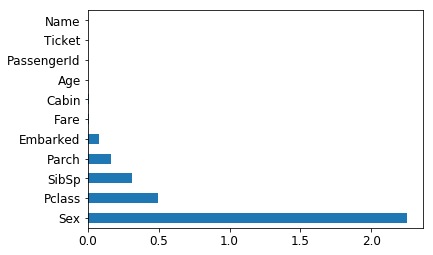

In [19]:
pd.Series(abs(log_reg.coef_[0]), index=X_train.columns).nlargest(len(log_reg.coef_[0])).plot(kind='barh')

In [20]:
svm_weights = pd.DataFrame(columns=["column", "weight"], data=[(X_train.columns[idx], abs(svm.coef_[0][idx])) for idx, element in enumerate(X_train.columns)])
svm_weights

,column,weight
0,PassengerId,0.00
1,Pclass,0.01
2,Name,0.00
3,Sex,0.27
4,Age,0.01
5,SibSp,0.01
6,Parch,0.01
7,Ticket,0.00
8,Fare,0.00
9,Cabin,0.00


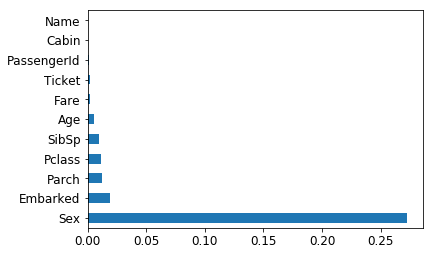

In [21]:
pd.Series(abs(svm.coef_[0]), index=X_train.columns).nlargest(len(log_reg.coef_[0])).plot(kind='barh')

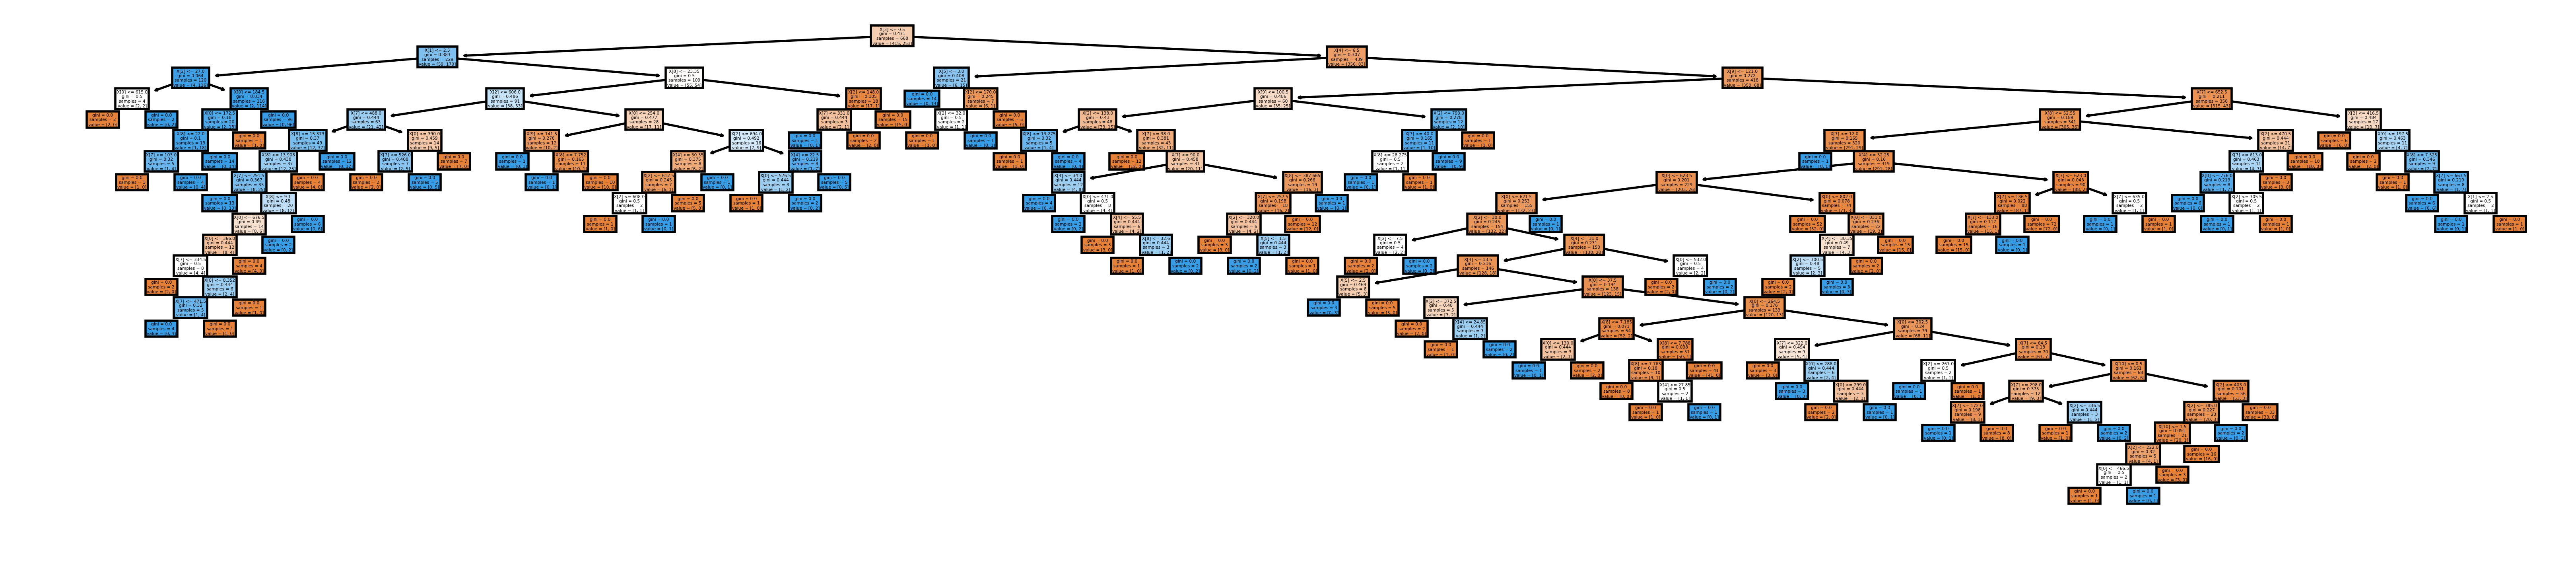

In [22]:
fig, axes = plt.subplots(figsize=(20, 4), dpi=400)
tree.plot_tree(decision_tree, filled=True)
fig.savefig('decision_tree_structure.png')